In [14]:
import sys
# Add parent directory to path to import file_paths module
sys.path.insert(0, '..')
import file_paths
import helper_functions

import eelbrain
from matplotlib import pyplot

In [15]:
# Configure the matplotlib figure style
FONT = 'Arial'
FONT_SIZE = 8
RC = {
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.transparent': True,
    # Font
    'font.family': 'sans-serif',
    'font.sans-serif': FONT,
    'font.size': FONT_SIZE,
    'figure.labelsize': FONT_SIZE,
    'figure.titlesize': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'axes.titlesize': FONT_SIZE,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,    
    'legend.fontsize': FONT_SIZE,
}
pyplot.rcParams.update(RC)

In [16]:
# Load envelope decoder TRFs for all subjects
trfs = []
r_values = []

SUBJECTS = helper_functions.get_subjects()

for subject in SUBJECTS:
    attended_trf_path = file_paths.TRF_DIR / subject / f'{subject}_attended_decoder_trf.pickle'
    unattended_trf_path = file_paths.TRF_DIR / subject / f'{subject}_unattended_decoder_trf.pickle'

    if attended_trf_path.exists() and unattended_trf_path.exists():
        trf_attended = eelbrain.load.unpickle(attended_trf_path)
        trf_unattended = eelbrain.load.unpickle(unattended_trf_path)
        trfs.append((trf_attended, trf_unattended))
        
        r_values.append((trf_attended.r, trf_unattended.r))
        # Note that r does not take into account the model’s ability to predict the magnitude of the response, only its shape; for a measure that reflects both, consider using proportion_explained.

        print(f"Loaded TRFs for {subject}")
    else:
        print(f"TRF files for {subject} not found, skipping.")
        

print(f"Loaded TRFs for {len(trfs)} subjects")

Loaded TRFs for S1
Loaded TRFs for S2
Loaded TRFs for S3
Loaded TRFs for S4
Loaded TRFs for S5
Loaded TRFs for S6
Loaded TRFs for S7
Loaded TRFs for S8
Loaded TRFs for S9
Loaded TRFs for S10
Loaded TRFs for S11
Loaded TRFs for S12
Loaded TRFs for S13
Loaded TRFs for S14
Loaded TRFs for S15
Loaded TRFs for S16
Loaded TRFs for S17
Loaded TRFs for S18
Loaded TRFs for 18 subjects


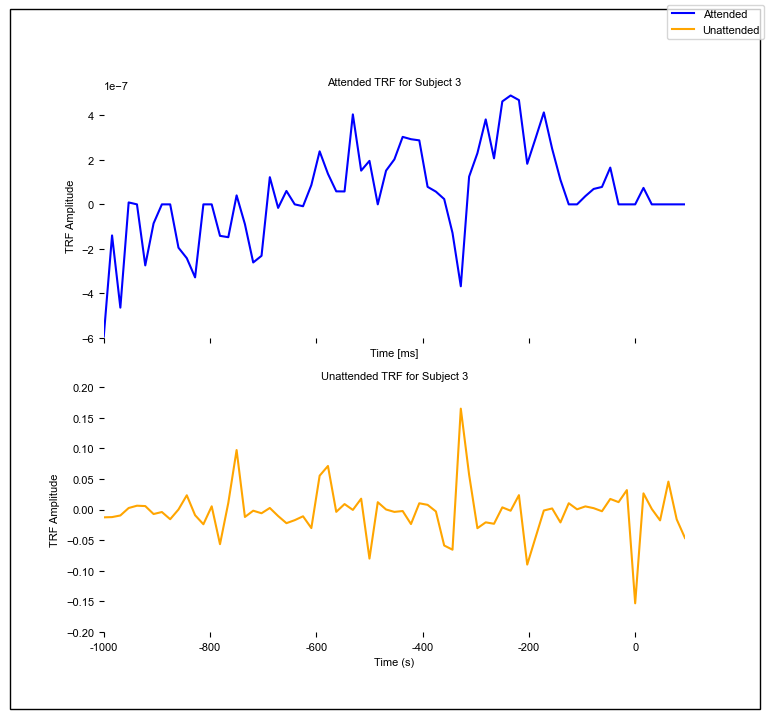

In [17]:
SUBJECT_NUMBER = 3

attended_trf_mean = trfs[SUBJECT_NUMBER -1 ][0].h_scaled.mean('sensor')
unattended_trf_mean = trfs[SUBJECT_NUMBER - 1][1].h_scaled.mean('sensor')

# plot the TRFs together in one plot for the first subject with pyplot
# Setup the figure layout
fig, axes = pyplot.subplots(2, figsize=(7.5, 7), sharex=True, subplot_kw=dict(frame_on=False))
eelbrain.plot.UTS(attended_trf_mean, axes=axes[0], color='blue')
eelbrain.plot.UTS(unattended_trf_mean, axes=axes[1], color='orange')

fig.legend(['Attended', 'Unattended'], loc='upper right')
axes[0].set_title(f'Attended TRF for Subject {SUBJECT_NUMBER}')
axes[1].set_title(f'Unattended TRF for Subject {SUBJECT_NUMBER}')
axes[0].set_ylabel('TRF Amplitude')
axes[1].set_ylabel('TRF Amplitude')
axes[1].set_xlabel('Time (s)')


eelbrain.plot.figure_outline()
fig.savefig(file_paths.FIGURES_DIR / 'comparison_attended_unattended.png', bbox_inches='tight')

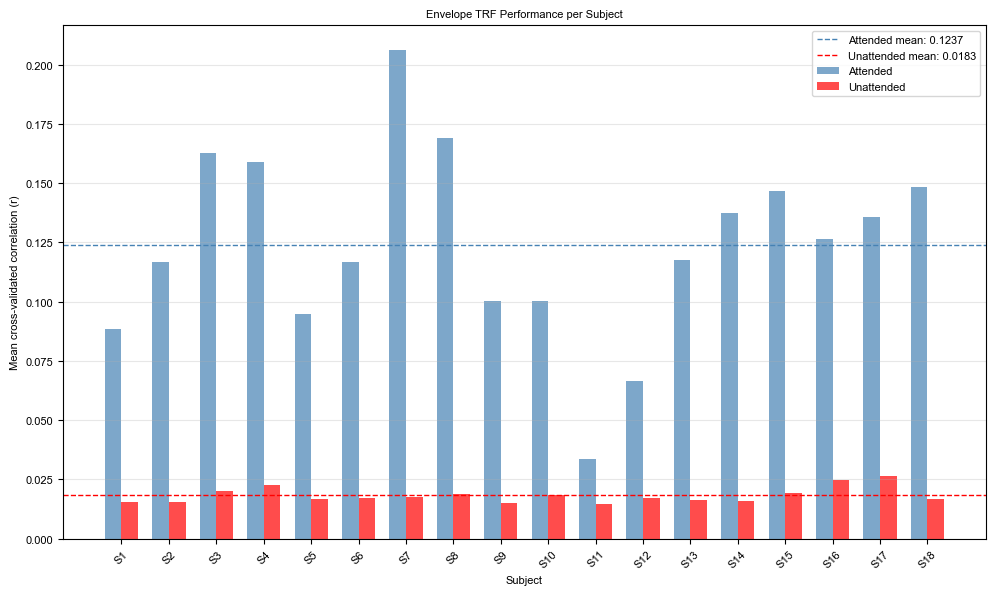

In [18]:
import numpy as np
from matplotlib import pyplot as plt

# Summary statistics across subjects
mean_attended_r_per_subject = [r_att.mean() for (r_att, _) in r_values]
mean_unattended_r_per_subject = [r_unatt.mean() for (_, r_unatt) in r_values]

# Create ONE subplot
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(mean_attended_r_per_subject))
width = 0.35  # Bar width

# Attended bars
ax.bar(
    x - width/2,
    mean_attended_r_per_subject,
    width,
    color='steelblue',
    alpha=0.7,
    label='Attended'
)

# Unattended bars
ax.bar(
    x + width/2,
    mean_unattended_r_per_subject,
    width,
    color='red',
    alpha=0.7,
    label='Unattended'
)

# Grand means
ax.axhline(
    np.mean(mean_attended_r_per_subject),
    color='steelblue',
    linestyle='--',
    linewidth=1,
    label=f'Attended mean: {np.mean(mean_attended_r_per_subject):.4f}'
)

ax.axhline(
    np.mean(mean_unattended_r_per_subject),
    color='red',
    linestyle='--',
    linewidth=1,
    label=f'Unattended mean: {np.mean(mean_unattended_r_per_subject):.4f}'
)

ax.set_xlabel('Subject')
ax.set_ylabel('Mean cross-validated correlation (r)')
ax.set_title('Envelope TRF Performance per Subject')
ax.set_xticks(x)
ax.set_xticklabels(
    [f'S{i+1}' for i in range(len(mean_attended_r_per_subject))],
    rotation=45
)

ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig(
    file_paths.FIGURES_DIR / 'decoder_comparison_attended_unattended_summary.png',
    bbox_inches='tight'
)